In [34]:
!conda env list


# conda environments:
#
base                   /opt/anaconda3
h501-gutenberg       * /opt/anaconda3/envs/h501-gutenberg
                       /opt/homebrew/Caskroom/miniconda/base



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Import the package module (avoid star-import so reload works reliably)
import tt_gutenberg.authors as authors_mod

In [58]:
gutenberg_authors = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_authors.csv')
gutenberg_languages = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_languages.csv')
gutenberg_metadata = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_metadata.csv')
gutenberg_subjects = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_subjects.csv')


In [57]:
"""
   Exercise 3
""" 
# Reload the authors module and display top aliases in a nice table
import importlib
importlib.reload(authors_mod)
# Get aliases (list of strings) and convert to DataFrame with counts
aliases = authors_mod.list_authors(by_languages=True, alias=True)
df_aliases = pd.DataFrame({'alias': aliases}) if aliases else pd.DataFrame(columns=['alias'])
# Count duplicates just in case and show a rank (aliases should already be ordered by translation count)
df_aliases['count'] = df_aliases.groupby('alias')['alias'].transform('count')
df_aliases = df_aliases.drop_duplicates().reset_index(drop=True)
# Show top 50 aliases. If you want more, change the number below
df_aliases.head(50)
# Optionally display length
print('total aliases:', len(df_aliases))

total aliases: 12337


In [59]:
# Load datasets once via the package helper and show status (force reload + verbose)
import importlib
import tt_gutenberg.utils as utils
# Ensuring the running kernel has the latest version of the utils module
importlib.reload(utils)
# calling the function with the new signature (reload=True, verbose=True)
utils.read_gutenberg_tables(reload=True, verbose=True)

Successfully loaded gutenberg_authors dataset.
Successfully loaded gutenberg_languages dataset.
Successfully loaded gutenberg_languages dataset.
Successfully loaded gutenberg_metadata dataset.
Successfully loaded gutenberg_metadata dataset.
Successfully loaded gutenberg_subjects dataset.
Successfully loaded gutenberg_subjects dataset.


{'gutenberg_authors':        gutenberg_author_id                   author  \
 0                        1            United States   
 1                        3         Lincoln, Abraham   
 2                        4           Henry, Patrick   
 3                        5               Adam, Paul   
 4                        7           Carroll, Lewis   
 ...                    ...                      ...   
 26072                58311  Wilmot-Buxton, Helen A.   
 26073                58312               Wood, Emma   
 26074                58314              Innes, Kate   
 26075                58315            Werner, M. R.   
 26076                58316           Nijland, G. J.   
 
                            alias  birthdate  deathdate  \
 0                         U.S.A.        NaN        NaN   
 1                            NaN     1809.0     1865.0   
 2                            NaN     1736.0     1799.0   
 3                            NaN     1849.0     1931.0   
 4      Do

In [60]:
# Diagnostic: inspect authors and translation stats to debug why aliases are empty
import tt_gutenberg.authors as authors_mod
importlib.reload(utils)
importlib.reload(authors_mod)
ds = utils.read_gutenberg_tables(reload=False, verbose=False)
authors = ds.get('gutenberg_authors')
print('authors present:', authors is not None)
if authors is None:
    raise RuntimeError('gutenberg_authors not found in datasets')
print('authors shape:', authors.shape)
print('authors columns:', authors.columns.tolist())
print('authors sample head:')
print(authors.head(10).to_dict(orient='records'))
alias_col = 'alias' if 'alias' in authors.columns else ('aliases' if 'aliases' in authors.columns else None)
print('detected alias_col:', alias_col)
if alias_col:
    print('sample alias values (first 20 unique):', authors[alias_col].dropna().astype(str).unique()[:20])
# compute per-author stats via package helper
stats = authors_mod.get_author_translation_stats(metadata=ds.get('gutenberg_metadata'), authors=authors, languages=ds.get('gutenberg_languages'))
print('stats columns:', stats.columns.tolist())
print('stats sample head:')
print(stats.head(10).to_dict(orient='records'))
print('birth_century counts (top 10):')
print(stats['birth_century'].value_counts().head(10).to_dict())
# call list_authors to show returned aliases
aliases = authors_mod.list_authors(by_languages=True, alias=True)
print('len aliases returned by list_authors:', len(aliases))
print('first 30 aliases from list_authors:', aliases[:30])

authors present: True
authors shape: (26077, 7)
authors columns: ['gutenberg_author_id', 'author', 'alias', 'birthdate', 'deathdate', 'wikipedia', 'aliases']
authors sample head:
[{'gutenberg_author_id': 1, 'author': 'United States', 'alias': 'U.S.A.', 'birthdate': nan, 'deathdate': nan, 'wikipedia': 'https://en.wikipedia.org/wiki/United_States', 'aliases': 'U.S.A.'}, {'gutenberg_author_id': 3, 'author': 'Lincoln, Abraham', 'alias': nan, 'birthdate': 1809.0, 'deathdate': 1865.0, 'wikipedia': 'https://en.wikipedia.org/wiki/Abraham_Lincoln', 'aliases': 'United States President (1861-1865)/Lincoln, Abe'}, {'gutenberg_author_id': 4, 'author': 'Henry, Patrick', 'alias': nan, 'birthdate': 1736.0, 'deathdate': 1799.0, 'wikipedia': 'https://en.wikipedia.org/wiki/Patrick_Henry', 'aliases': nan}, {'gutenberg_author_id': 5, 'author': 'Adam, Paul', 'alias': nan, 'birthdate': 1849.0, 'deathdate': 1931.0, 'wikipedia': 'https://de.wikipedia.org/wiki/Paul_Adam_(Buchbinder)', 'aliases': nan}, {'gutenbe

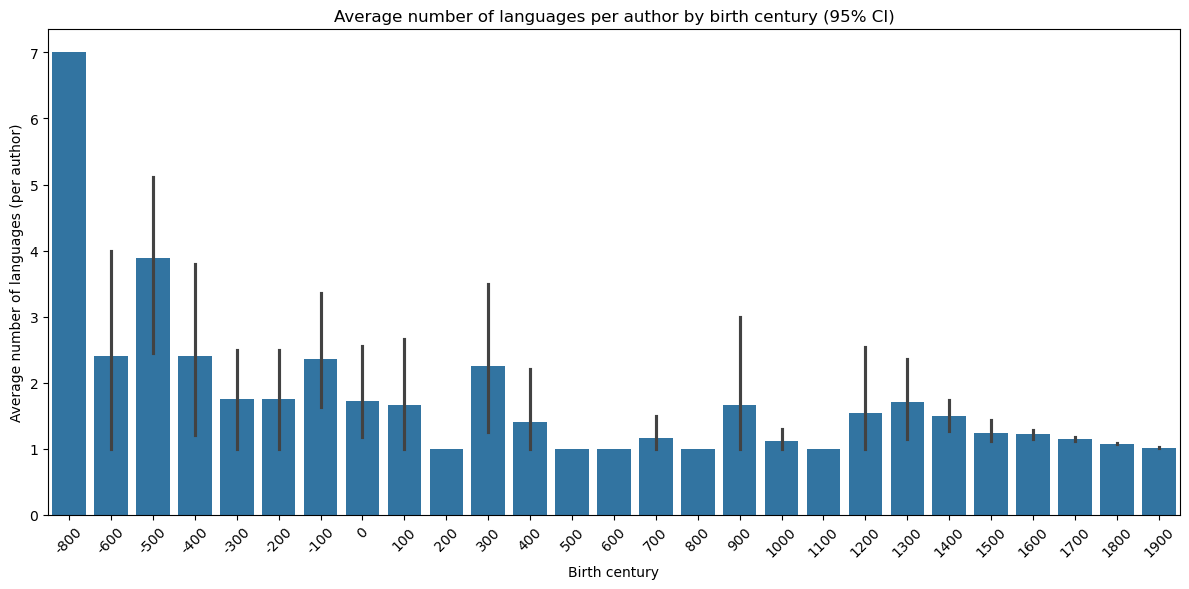

,birth_century,mean,count,std
0,-800,7.000000,1,NaN
1,-600,2.400000,5,1.949359
2,-500,3.888889,9,2.260777
3,-400,2.400000,5,1.673320
4,-300,1.750000,4,0.957427
5,-200,1.750000,4,0.957427
6,-100,2.363636,11,1.501514
7,0,1.727273,11,1.272078
8,100,1.666667,6,1.032796
9,200,1.000000,5,0.000000


In [ ]:
"""
# Optional:  Plot average number of languages per author by birth century with 95% CI 
"""
# Use the authors module helper to get author-level translation stats
# This delegates the heavy lifting to tt_gutenberg.authors.get_author_translation_stats
df = authors_mod.get_author_translation_stats(metadata=gutenberg_metadata, authors=gutenberg_authors, languages=gutenberg_languages)
# checking columns we need are present
if 'birth_century' not in df.columns or 'trans_count' not in df.columns:
    raise RuntimeError('Required columns missing from translation stats')
# dropping rows with missing birth_century
df = df.dropna(subset=['birth_century'])
df['trans_count'] = pd.to_numeric(df['trans_count'], errors='coerce').fillna(0)
order = sorted(df['birth_century'].unique())
# plotting
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='birth_century', y='trans_count', order=order, estimator=lambda x: x.mean(), errorbar=('ci',95), color='C0')
plt.xlabel('Birth century')
plt.ylabel('Average number of languages (per author)')
plt.title('Average number of languages per author by birth century (95% CI)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
agg = df.groupby('birth_century')['trans_count'].agg(['mean','count','std']).reset_index().sort_values('birth_century')
agg